# TimML Exercises

## Exercise 2: A system with wells, rivers, and recharge

Consider a system of three aquifers. The aquifer parameters are presented in Table 1; note that an average thickness is specified for the top unconfined aquifer. A river with three branches cuts through the upper aquifer. The river is modeled with 7 head-specified line-sinks and each branch is modeled with 5 line-sinks. The Northern branch is modeled with resistance line-sinks with a resistance $c$ of 5 days and a width $w$ of 10 meters. The heads are specified at the centers of the line-sinks and are shown in Figure 1. 

Three wells are present. Well 1 is screened in aquifer 0 and has a discharge of 1000 m$^3$/d, well 2 is screened in aquifer 2 and has a discharge of 5000 m$^3$/d, and well 3 is screened in aquifers 1 and 2 and has a total discharge of 5000 m$^3$/d. A constant recharge through the upper boundary of aquifer 0 is simulated by one large circular infiltration area that covers the entire model area; the recharge rate is 0.2 mm/day. A head of 175 m is specified in layer 0 at the upper righthand corner of the model domain. A layout of all analytic elements, except the boundary of the infiltration area, is shown in Figure 1. 

#### Table 1: Aquifer data for Exercise 2
|             | $k$ (m/d) | $z_b$ (m) | $z_t$ | $c$ (days) | $n$ (-) | $n_{ll}$ (-) |
|------------:|----------:|----------:|------:|-----------:|--------:|----------:|
|Aquifer 0    |   2       |   140     | 165   |            |  0.3    |           | 
|Leaky Layer 1|           |   120     | 140   |    2000    |         |   0.2     |    
|Aquifer 1    |   6       |   80      | 120   |            |  0.25   |           |  
|Leaky Layer 2|           |   60      | 80    |    20000   |         |   0.25    |  
|Aquifer 2    |   4       |   0       | 60    |            |  0.3    |           ||

<img src="Layout_exercise2.png"> </img>

#### Figure 1: Layout of elements for Exercise 2. Heads at centers of line-sinks are indicated. 

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

In [2]:
# Create basic model elements
ml = Model(k=[2, 6, 4],
           zb=[140, 80, 0],
           zt=[165, 120, 60],
           c=[2000, 20000],
           n=[0.3, 0.25, 0.3],
           nll=[0.2, 0.25])
rf = Constant(ml, xr=20000, yr=20000, head=175, layer=0)
p = CircAreaSink(ml, xp=10000, yp=10000, Rp=15000, infil=0.0002, layer=0)
w1 = Well(ml, xw=10000, yw=8000, Qw=1000, rw=0.3, layers=0, label='well 1')
w2 = Well(ml, xw=12100, yw=10700, Qw=5000, rw=0.3, layers=2, label='well 2')
w3 = Well(ml, xw=10000, yw=4600, Qw=5000, rw=0.3, layers=[1,2], label='maq well')
#
HeadLineSink(ml, x1=9510, y1=19466, x2=12620, y2=17376, head=170, layers=0)
HeadLineSink(ml, 12620, 17376, 12753, 14976, 168, [0])
HeadLineSink(ml, 12753, 14976, 13020, 12176, 166, [0])
HeadLineSink(ml, 13020, 12176, 15066, 9466,  164, [0])
HeadLineSink(ml, 15066, 9466,  16443, 7910,  162, [0])
HeadLineSink(ml, 16443, 7910,  17510, 5286,  160, [0])
HeadLineSink(ml, 17510, 5286,  17600, 976,   158, [0])
#
HeadLineSink(ml, 356,   6976,  4043,  7153, 174, [0])
HeadLineSink(ml, 4043,  7153,  6176,  8400, 171, [0])
HeadLineSink(ml, 6176,  8400,  9286,  9820, 168, [0])
HeadLineSink(ml, 9286,  9820,  12266, 9686, 166, [0])
HeadLineSink(ml, 12266, 9686,  15066, 9466, 164, [0])
#
HeadLineSink(ml, 1376,  1910,  4176,  2043, 170, [0])
HeadLineSink(ml, 4176,  2043,  6800,  1553, 166, [0])
HeadLineSink(ml, 6800,  1553,  9953,  2086, 162, [0])
HeadLineSink(ml, 9953,  2086,  14043, 2043, 160, [0])
HeadLineSink(ml, 14043, 2043,  17600, 976 , 158, [0])
#
ResLineSink(ml, x1=12753, y1=14976, x2=10781, y2=14895, head=168, res=5, width=10, layers=[0])
ResLineSink(ml, 10781, 14895, 8385,  15677, 170, 5, 10, [0])
ResLineSink(ml,  8385, 15677, 6094,  15885, 172, 5, 10, [0])
ResLineSink(ml,  6094, 15885, 3229,  14843, 174, 5, 10, [0])
ls = ResLineSink(ml,  3229, 14843,  833,  14261, 176, 5, 10, [0])

### Questions:
#### Exercise 2a
Solve the model and create a contour plot.

Starting solve
Number of elements:  27
Percent progress:  0 10 20 30 40 50 60 70 80 90 100  
size of matrix (25, 25)
Solution complete


<IPython.core.display.Javascript object>


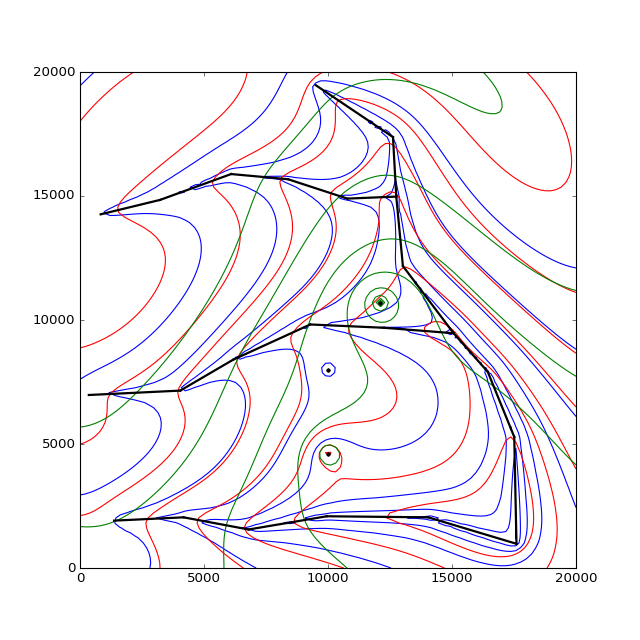

grid of (100, 100). gridding in progress. hit ctrl-c to abort
done with contouring
done with contouring
done with contouring


In [3]:
ml.solve()
timlayout(ml, width=2)  # to make wider lines
timcontour(ml, 0, 20000, 100, 0, 20000, 100, 3, levels=10, newfig=False, width=1, size=(6,6))
from matplotlib.pyplot import savefig
savefig('timmlexample.png', transparent=True)

#### Exercise 2b
Note that the last line-sink is given a name (ls). Check the head at the center of this line-sink. Does the
resistance of the bottom have a big effect?

In [4]:
print 'the head at the center of ResLineSink ls is:'
print ml.head(0, ls.xcp, ls.ycp)
# Or as an alternative use ls.check()

the head at the center of ResLineSink ls is:
176.310578099


#### Exercise 2c
What are the heads at the three wells?

In [5]:
print 'The head at well 1 is:', ml.headVector(w1.xw, w1.yw)
print 'The head at well 2 is:', ml.headVector(w2.xw, w2.yw)
print 'The head at well 3 is:', ml.headVector(w3.xw, w3.yw)

The head at well 1 is: [ 146.64926901  168.5437178   168.61940564]
The head at well 2 is: [ 168.08176169  167.74139375  139.58008204]
The head at well 3 is: [ 166.07750996  153.65807146  153.65807146]


#### Exercise 2d 
Zoom in on the river near Well 1 and assess visually the accuracy of the head along the river by making
a local contour plot.

grid of (100, 100). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


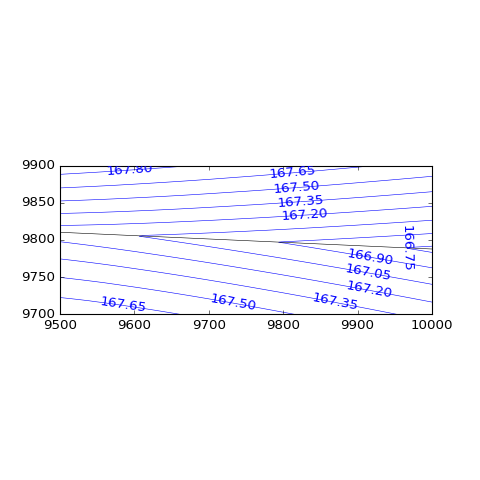

done with contouring


In [6]:
timcontour(ml, 9500, 10000, 100, 9700, 9900, 100, levels=10, labels=1, size=(6,6))
# Head contours are continuous across river
# There is a slope in the head along the river

#### Exercise 2e
Create a contour plot including a cross-section (`xsec=True`).
Create capture zones for all three wells, for example for 50 years.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


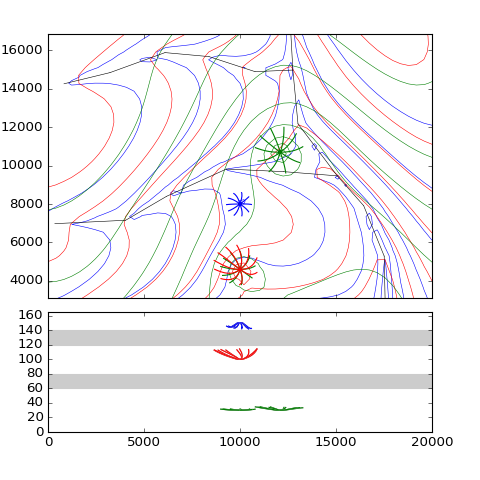

done with contouring
done with contouring
done with contouring
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax


In [7]:
# Create a contour plot for the area
timcontour(ml, 0, 20000, 50, 0, 20000, 50, 3, levels=10, xsec=True, size=(6,6))

# Capture zone is not working in Ipython Notebook yet!
capturezone(ml, w=w1, N=10, z=150, tmax=50*365.25, xsec=True)
capturezone(ml, w=w2, N=10, z=30, tmax=50*365.25, xsec=True)
capturezone(ml, w=w3, N=10, z=30, tmax=50*365.25, xsec=True)
capturezone(ml, w=w3, N=10, z=100, tmax=50*365.25, xsec=True)

#### Exercise 2f
Replace the circular area-sink by a polygonal area-sink with corners (0,0), (20000,-2000), (15000,25000),
and (-2000,20000) with a recharge of 0.2 mm/day. Solve the model. Has the head at well 1 changed a lot?

In [8]:
# Save the old head first
oldhead = ml.headVector(w1.xw, w1.yw)
print p
# Remove the old circular area-sink
ml.elementList.remove(p )

CircAreaSink xp,yp,Rp,infil,layer: (10000.0, 10000.0, 15000.0, 0.0002, 0)


In [9]:
# Add the newpolygon area-sink to the model
p_new = PolyAreaSink(ml, 
                     xylist=[(0, 0), (20000, 0), (20000, 20000), (0, 20000)], 
                     infil=0.0002)  # automatically added to layer 0
print p_new

# Solve the model again
ml.solve()

#Compare the old and the new heads
print 'The old head at well 1:', oldhead
print 'The new head at well 1:', ml.headVector(w1.xw, w1.yw)
print ''
print 'The difference between the old and the new head at Well 1 is:'
print oldhead - ml.headVector(w1.xw, w1.yw)

PolyAreaSink xylist,infil: [(0, 0), (20000, 0), (20000, 20000), (0, 20000)], 0.0002
Starting solve
Number of elements:  27
Percent progress:  0 10 20 30 40 50 60 70 80 90 100  
size of matrix (25, 25)
Solution complete
The old head at well 1: [ 146.64926901  168.5437178   168.61940564]
The new head at well 1: [ 146.45413857  168.34727204  168.36111925]

The difference between the old and the new head at Well 1 is:
[ 0.19513045  0.19644576  0.25828639]
